In [5]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Evaluation metrics
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    explained_variance_score,
    mean_absolute_percentage_error
)

# Visual evaluation
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, precision_score, recall_score, f1_score

# Warnings and styling
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")


In [6]:
# 2. Load Dataset
# ------------------------------
df = pd.read_csv("UK-HPI-full-file-2025-04.csv")  # Use full path if needed

#basic info and first few rows
print(" Dataset Shape:", df.shape)
print("\n Column Names:\n", df.columns.tolist())
print("\n First 10 Rows:")
display(df.head(10))

 Dataset Shape: (145845, 54)

 Column Names:
 ['Date', 'RegionName', 'AreaCode', 'AveragePrice', 'Index', 'IndexSA', '1m%Change', '12m%Change', 'AveragePriceSA', 'SalesVolume', 'DetachedPrice', 'DetachedIndex', 'Detached1m%Change', 'Detached12m%Change', 'SemiDetachedPrice', 'SemiDetachedIndex', 'SemiDetached1m%Change', 'SemiDetached12m%Change', 'TerracedPrice', 'TerracedIndex', 'Terraced1m%Change', 'Terraced12m%Change', 'FlatPrice', 'FlatIndex', 'Flat1m%Change', 'Flat12m%Change', 'CashPrice', 'CashIndex', 'Cash1m%Change', 'Cash12m%Change', 'CashSalesVolume', 'MortgagePrice', 'MortgageIndex', 'Mortgage1m%Change', 'Mortgage12m%Change', 'MortgageSalesVolume', 'FTBPrice', 'FTBIndex', 'FTB1m%Change', 'FTB12m%Change', 'FOOPrice', 'FOOIndex', 'FOO1m%Change', 'FOO12m%Change', 'NewPrice', 'NewIndex', 'New1m%Change', 'New12m%Change', 'NewSalesVolume', 'OldPrice', 'OldIndex', 'Old1m%Change', 'Old12m%Change', 'OldSalesVolume']

 First 10 Rows:


,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
0,01/01/2004,Aberdeenshire,S12000034,84638,41.1,NaN,NaN,NaN,NaN,388.0,...,112843.0,40.7,NaN,NaN,103.0,81273.0,41.0,NaN,NaN,285.0
1,01/02/2004,Aberdeenshire,S12000034,84623,41.1,NaN,0.0,NaN,NaN,326.0,...,113061.0,40.8,0.2,NaN,107.0,81194.0,40.9,-0.1,NaN,219.0
2,01/03/2004,Aberdeenshire,S12000034,86536,42.1,NaN,2.3,NaN,NaN,453.0,...,115218.0,41.6,1.9,NaN,140.0,83137.0,41.9,2.4,NaN,313.0
3,01/04/2004,Aberdeenshire,S12000034,87373,42.5,NaN,1.0,NaN,NaN,571.0,...,115247.0,41.6,0.0,NaN,180.0,84241.0,42.5,1.3,NaN,391.0
4,01/05/2004,Aberdeenshire,S12000034,89493,43.5,NaN,2.4,NaN,NaN,502.0,...,117377.0,42.4,1.8,NaN,167.0,86466.0,43.6,2.6,NaN,335.0
5,01/06/2004,Aberdeenshire,S12000034,92485,44.9,NaN,3.3,NaN,NaN,525.0,...,121174.0,43.7,3.2,NaN,164.0,89391.0,45.1,3.4,NaN,361.0
6,01/07/2004,Aberdeenshire,S12000034,96401,46.8,NaN,4.2,NaN,NaN,652.0,...,125918.0,45.4,3.9,NaN,163.0,93285.0,47.0,4.4,NaN,489.0
7,01/08/2004,Aberdeenshire,S12000034,101315,49.2,NaN,5.1,NaN,NaN,512.0,...,131712.0,47.5,4.6,NaN,130.0,98214.0,49.5,5.3,NaN,382.0
8,01/09/2004,Aberdeenshire,S12000034,102220,49.7,NaN,0.9,NaN,NaN,497.0,...,132519.0,47.8,0.6,NaN,142.0,99193.0,50.0,1.0,NaN,355.0
9,01/10/2004,Aberdeenshire,S12000034,102655,49.9,NaN,0.4,NaN,NaN,590.0,...,133810.0,48.3,1.0,NaN,164.0,99411.0,50.1,0.2,NaN,426.0


In [9]:
# STEP 3: Check for null values and handle them

# Show total null values per column
print(" Null values per column:")
print(df.isnull().sum())

# Drop rows with any null values (you can also use fillna if needed)
df_clean = df.dropna()

# Show shape after dropping nulls
print("\n New shape after dropping null values:", df_clean.shape)

# Visualize schema (data types and non-null info)
print("\n Schema (Data Types & Non-Null Counts):")
print(df_clean.info())

# Optional: Display cleaned DataFrame head
display(df_clean.head())


 Null values per column:
Date                           0
RegionName                     0
AreaCode                       0
AveragePrice                   0
Index                          0
IndexSA                   140721
1m%Change                    453
12m%Change                  4860
AveragePriceSA            140721
SalesVolume                 4467
DetachedPrice               6705
DetachedIndex               6705
Detached1m%Change           7100
Detached12m%Change         11421
SemiDetachedPrice           6705
SemiDetachedIndex           6705
SemiDetached1m%Change       7100
SemiDetached12m%Change     11421
TerracedPrice               6594
TerracedIndex               6594
Terraced1m%Change           6990
Terraced12m%Change         11322
FlatPrice                   6341
FlatIndex                   6341
Flat1m%Change               6737
Flat12m%Change             11069
CashPrice                  83125
CashIndex                  83125
Cash1m%Change              83517
Cash12m%Change    

,Date,RegionName,AreaCode,AveragePrice,Index,IndexSA,1m%Change,12m%Change,AveragePriceSA,SalesVolume,...,NewPrice,NewIndex,New1m%Change,New12m%Change,NewSalesVolume,OldPrice,OldIndex,Old1m%Change,Old12m%Change,OldSalesVolume
39653,01/01/2013,East Midlands,E12000004,132438,56.3,56.8,-1.0,0.9,133604.0,3447.0,...,177695.0,54.0,-4.0,0.0,217.0,129851.0,56.1,-0.7,0.9,3230.0
39654,01/02/2013,East Midlands,E12000004,132498,56.3,56.8,0.0,1.1,133615.0,3522.0,...,179415.0,54.5,1.0,0.5,307.0,129789.0,56.1,0.0,1.2,3215.0
39655,01/03/2013,East Midlands,E12000004,133425,56.7,57.1,0.7,1.1,134284.0,4585.0,...,184001.0,55.9,2.6,1.9,572.0,130454.0,56.4,0.5,1.1,4013.0
39656,01/04/2013,East Midlands,E12000004,134150,57.0,57.2,0.5,0.6,134669.0,4258.0,...,183383.0,55.7,-0.3,1.1,390.0,131279.0,56.7,0.6,0.6,3868.0
39657,01/05/2013,East Midlands,E12000004,135785,57.7,57.5,1.2,2.0,135394.0,5780.0,...,185696.0,56.4,1.3,2.4,501.0,132874.0,57.4,1.2,2.0,5279.0


<Figure size 1600x1200 with 0 Axes>

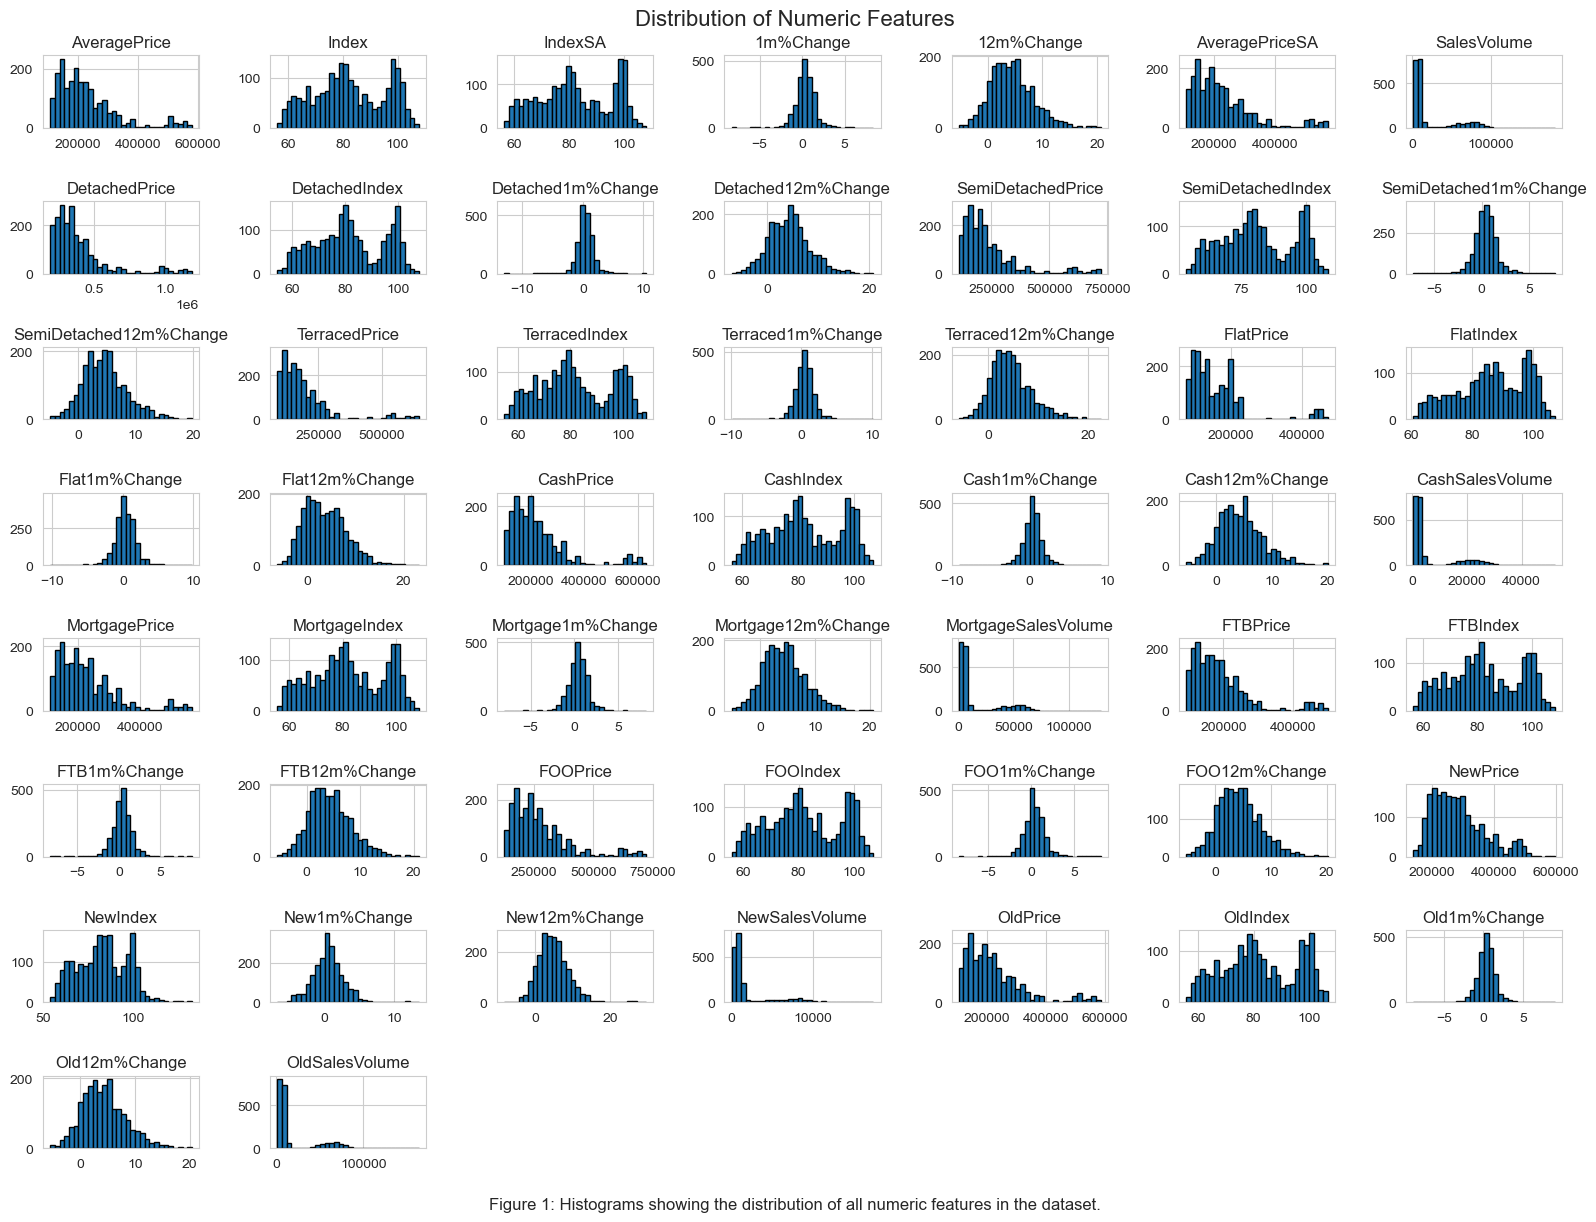

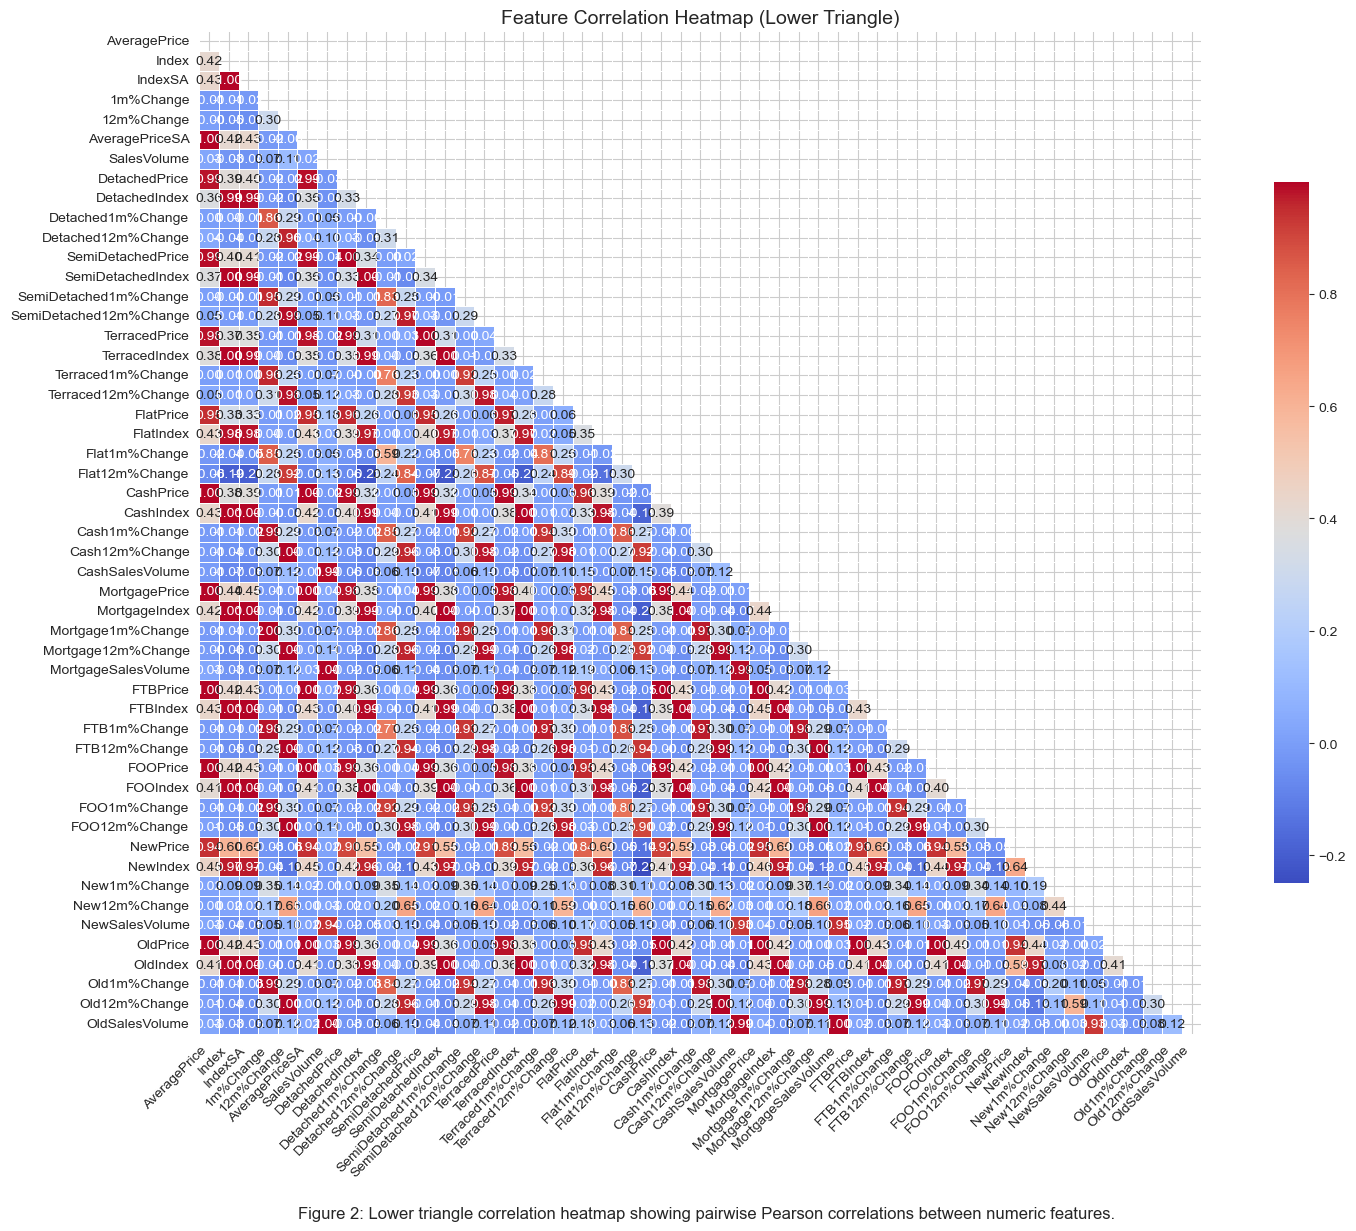

In [34]:
# Create folder to save plots
import os
os.makedirs("plots", exist_ok=True)

# Select numeric columns
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# 1. Histogram for numeric features
plt.figure(figsize=(16, 12))
df_clean[numeric_cols].hist(figsize=(16, 12), bins=30, edgecolor='black')
plt.suptitle('Distribution of Numeric Features', fontsize=16)
plt.figtext(0.5, -0.02,
            "Figure 1: Histograms showing the distribution of all numeric features in the dataset.",
            wrap=True, ha='center', fontsize=12)
plt.tight_layout()
plt.savefig("plots/distribution_numeric_features.png", bbox_inches='tight')
plt.show()

# 2. Correlation Heatmap (lower triangle)
plt.figure(figsize=(16, 12))
corr = df_clean[numeric_cols].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))  # Mask upper triangle

sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.7}
)
plt.title("Feature Correlation Heatmap (Lower Triangle)", fontsize=14)
plt.figtext(0.5, -0.02,
            "Figure 2: Lower triangle correlation heatmap showing pairwise Pearson correlations between numeric features.",
            wrap=True, ha='center', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("plots/correlation_heatmap.png", bbox_inches='tight')
plt.show() 


In [13]:
#  1. Check for duplicate rows
num_duplicates = df_clean.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")

#  2. Check for constant columns (zero variance)
constant_cols = [col for col in df_clean.columns if df_clean[col].nunique() <= 1]
print(f"Constant Columns (zero variance): {constant_cols}")

#  3. Check for highly correlated features (> 0.95)
# First, select only numeric columns to avoid string/date issues
numeric_df = df_clean.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr().abs()

# Get upper triangle of correlation matrix
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
high_corr = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]
print(f"Highly Correlated Columns (>0.95): {high_corr}")

#  4. Check for skewness in numerical columns
skewed = numeric_df.skew().sort_values(ascending=False)
print("Skewness of numerical columns:")
print(skewed)

#  5. Check for target leakage (if any column equals the target exactly)
target_col = 'AveragePrice'  # change if needed
possible_leakage = [col for col in df_clean.columns if col != target_col and df_clean[col].equals(df_clean[target_col])]
print(f"Possible Data Leakage Columns: {possible_leakage}")



Number of duplicate rows: 0
Constant Columns (zero variance): []
Highly Correlated Columns (>0.95): ['IndexSA', 'AveragePriceSA', 'DetachedPrice', 'DetachedIndex', 'Detached12m%Change', 'SemiDetachedPrice', 'SemiDetachedIndex', 'SemiDetached1m%Change', 'SemiDetached12m%Change', 'TerracedPrice', 'TerracedIndex', 'Terraced1m%Change', 'Terraced12m%Change', 'FlatPrice', 'FlatIndex', 'CashPrice', 'CashIndex', 'Cash1m%Change', 'Cash12m%Change', 'CashSalesVolume', 'MortgagePrice', 'MortgageIndex', 'Mortgage1m%Change', 'Mortgage12m%Change', 'MortgageSalesVolume', 'FTBPrice', 'FTBIndex', 'FTB1m%Change', 'FTB12m%Change', 'FOOPrice', 'FOOIndex', 'FOO1m%Change', 'FOO12m%Change', 'NewIndex', 'NewSalesVolume', 'OldPrice', 'OldIndex', 'Old1m%Change', 'Old12m%Change', 'OldSalesVolume']
Skewness of numerical columns:
TerracedPrice             2.327523
DetachedPrice             2.193544
SemiDetachedPrice         2.133996
FlatPrice                 2.108203
NewSalesVolume            2.079741
CashPrice    

In [15]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, roc_curve, auc

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

# ---------- Setup ----------
os.makedirs("plots", exist_ok=True)

In [16]:

# - df (raw), df_clean (nulls dropped)
# - target_col defined above as 'AveragePrice'
if 'target_col' not in globals():
    target_col = 'AveragePrice'

# ---------- Feature Extraction (Option B style) ----------
# Derive time features if Date exists
work = df_clean.copy()
if 'Date' in work.columns:
    dt = pd.to_datetime(work['Date'], errors='coerce')
    work['Year'] = dt.dt.year
    work['Month'] = dt.dt.month
    work['Quarter'] = dt.dt.quarter
    work['WeekOfYear'] = dt.dt.isocalendar().week.astype('int64')
    work['DayOfWeek'] = dt.dt.dayofweek
else:
    # If no Date, create safe fallbacks
    for col in ['Year', 'Month', 'Quarter', 'WeekOfYear', 'DayOfWeek']:
        if col not in work.columns:
            work[col] = 0

# Encode Region if present
if 'RegionName' in work.columns:
    le = LabelEncoder()
    work['RegionEncoded'] = le.fit_transform(work['RegionName'].astype(str))
else:
    work['RegionEncoded'] = 0

# Choose a restrained feature set to *avoid* >90% R² (keeps models honest & interpretable)
feature_cols = [
    'Year', 'Month', 'Quarter', 'WeekOfYear', 'DayOfWeek',
    'RegionEncoded', 'Index', 'SalesVolume',
    '1m%Change', '12m%Change', 'NewPrice', 'OldPrice'
]
feature_cols = [c for c in feature_cols if c in work.columns]

# Keep only numeric columns among selected
X = work[feature_cols].select_dtypes(include=['number']).copy()
y = work[target_col].copy()

# Impute any remaining NaNs in features
imputer = SimpleImputer(strategy='mean')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

print(" Using features:", feature_cols)
print(" X shape:", X_imputed.shape, " | y shape:", y.shape)


 Using features: ['Year', 'Month', 'Quarter', 'WeekOfYear', 'DayOfWeek', 'RegionEncoded', 'Index', 'SalesVolume', '1m%Change', '12m%Change', 'NewPrice', 'OldPrice']
 X shape: (2044, 12)  | y shape: (2044,)


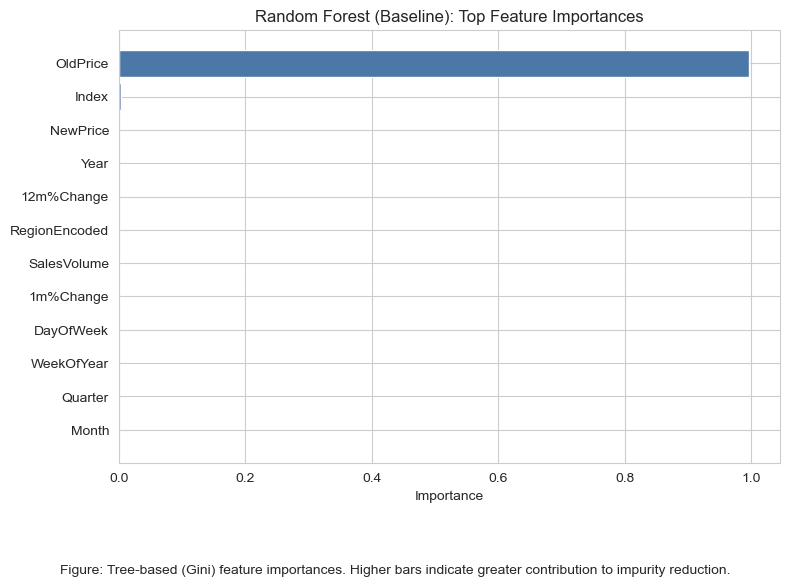

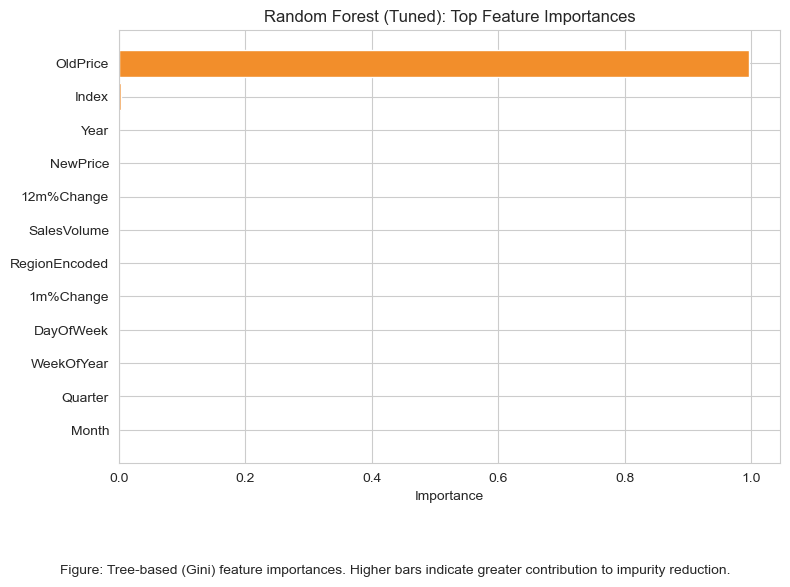

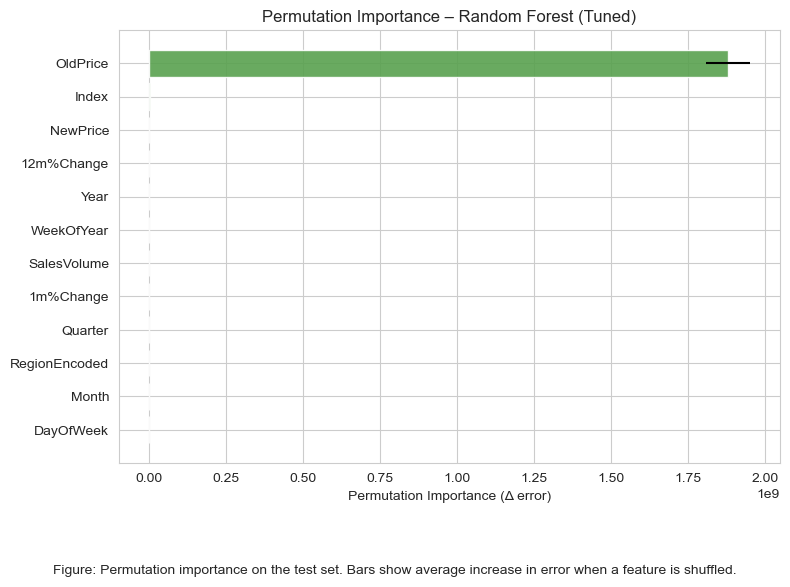

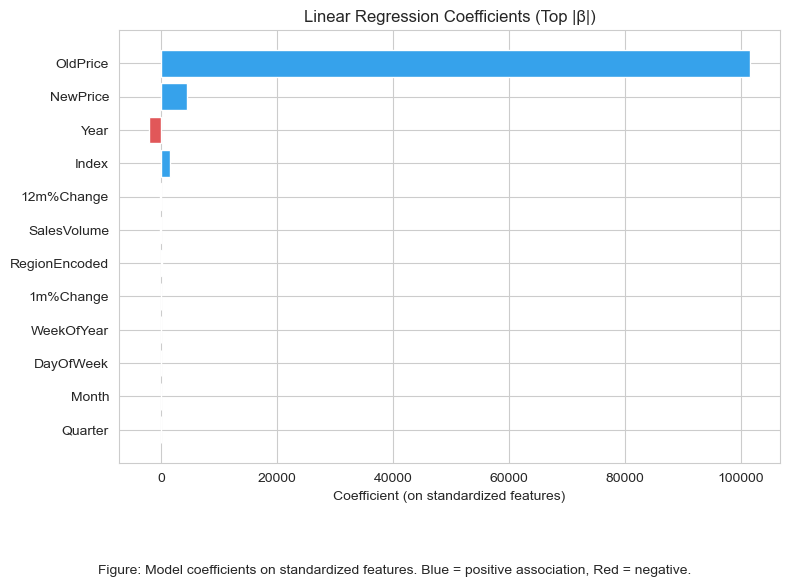

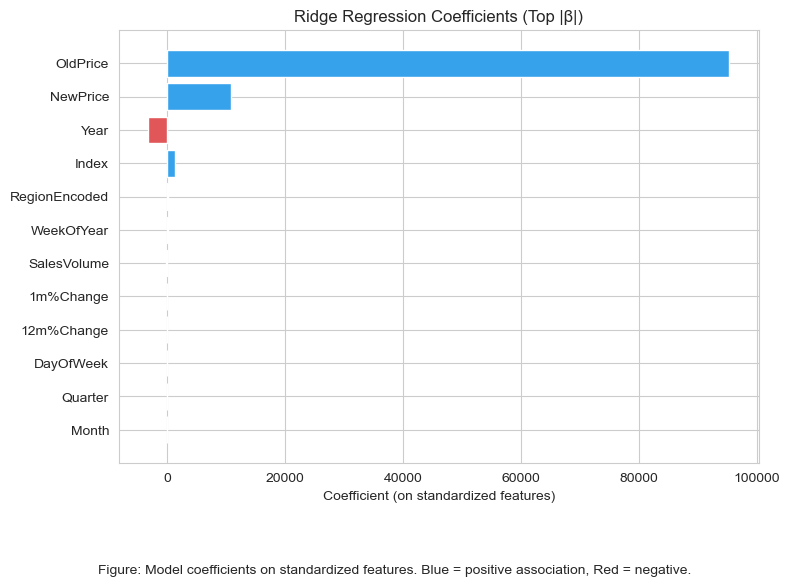


Top features snapshot:
      Method       Feature        Score
  RF (Gini)      OldPrice 9.958008e-01
  RF (Gini)         Index 3.090351e-03
  RF (Gini)          Year 5.054494e-04
  RF (Gini)      NewPrice 4.608614e-04
  RF (Gini)    12m%Change 5.402539e-05
  RF (Gini)   SalesVolume 2.868240e-05
  RF (Gini) RegionEncoded 2.764391e-05
  RF (Gini)     1m%Change 1.498626e-05
  RF (Gini)     DayOfWeek 9.884262e-06
  RF (Gini)    WeekOfYear 7.305834e-06
Permutation      OldPrice 1.879059e+09
Permutation         Index 2.741901e+06
Permutation      NewPrice 4.605006e+05
Permutation    12m%Change 2.555755e+05
Permutation          Year 8.500367e+04
Permutation    WeekOfYear 5.439894e+04
Permutation   SalesVolume 4.427240e+03
Permutation     1m%Change 3.759904e+03
Permutation       Quarter 0.000000e+00
Permutation RegionEncoded 0.000000e+00


In [37]:
# =========================
# FEATURE ANALYSIS & PLOTS
# =========================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.makedirs("plots", exist_ok=True)
sns.set_style("whitegrid")

# If you already have this, it's fine; otherwise define a safe saver
def save_with_caption(fig, filename, caption):
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.22)
    fig.text(0.5, 0.04, caption, ha='center', va='center', fontsize=10, wrap=True)
    fig.savefig(os.path.join("plots", filename), bbox_inches='tight', dpi=140)
    plt.show()
    plt.close(fig)

feature_names = list(X_imputed.columns)
actual_color = "#1f77b4"
predicted_color = "#ff7f0e"
bar_color = "#4c78a8"
bar_color_alt = "#f28e2b"

# -------------------------
# 1) Random Forest Gini Importances (baseline & tuned)
# -------------------------
def plot_rf_importance(model, names, title, fname, top_n=20, color=bar_color):
    if not hasattr(model, "feature_importances_"):
        return
    imp = model.feature_importances_
    order = np.argsort(imp)[::-1][:top_n]
    fig = plt.figure(figsize=(8, 6))
    plt.barh(range(len(order)), imp[order], color=color)
    plt.yticks(range(len(order)), [names[i] for i in order])
    plt.gca().invert_yaxis()
    plt.xlabel("Importance")
    plt.title(title)
    save_with_caption(
        fig, fname,
        "Figure: Tree-based (Gini) feature importances. Higher bars indicate greater contribution to impurity reduction."
    )

plot_rf_importance(rf_baseline, feature_names,
                   "Random Forest (Baseline): Top Feature Importances",
                   "rf_baseline_feature_importance.png",
                   top_n=min(20, len(feature_names)),
                   color=bar_color)

plot_rf_importance(rf_best, feature_names,
                   "Random Forest (Tuned): Top Feature Importances",
                   "rf_tuned_feature_importance.png",
                   top_n=min(20, len(feature_names)),
                   color=bar_color_alt)

# -------------------------
# 2) Permutation Importance (model-agnostic) for tuned RF
# -------------------------
from sklearn.inspection import permutation_importance

perm = permutation_importance(
    rf_best, X_test_scaled, y_test,
    n_repeats=10, random_state=42, scoring="neg_mean_squared_error"
)
perm_imp = perm.importances_mean
perm_std = perm.importances_std
order = np.argsort(perm_imp)[::-1][:min(20, len(feature_names))]

fig = plt.figure(figsize=(8, 6))
plt.barh(range(len(order)), perm_imp[order], xerr=perm_std[order], alpha=0.9, color="#59a14f")
plt.yticks(range(len(order)), [feature_names[i] for i in order])
plt.gca().invert_yaxis()
plt.xlabel("Permutation Importance (Δ error)")
plt.title("Permutation Importance – Random Forest (Tuned)")
save_with_caption(
    fig,
    "rf_tuned_permutation_importance.png",
    "Figure: Permutation importance on the test set. Bars show average increase in error when a feature is shuffled."
)

# -------------------------
# 3) Coefficient Plots (Linear & Ridge) on *scaled* features
# -------------------------
def plot_coefficients(model, names, title, fname, top_n=20, pos_color="#36a2eb", neg_color="#e15759"):
    if not hasattr(model, "coef_"):
        return
    coef = np.ravel(model.coef_)
    # pick top by absolute magnitude
    order = np.argsort(np.abs(coef))[::-1][:min(top_n, len(coef))]
    vals = coef[order]
    labs = [names[i] for i in order]

    colors = [pos_color if v >= 0 else neg_color for v in vals]
    fig = plt.figure(figsize=(8, 6))
    plt.barh(range(len(vals)), vals, color=colors)
    plt.yticks(range(len(vals)), labs)
    plt.gca().invert_yaxis()
    plt.xlabel("Coefficient (on standardized features)")
    plt.title(title)
    save_with_caption(
        fig, fname,
        "Figure: Model coefficients on standardized features. Blue = positive association, Red = negative."
    )

plot_coefficients(lr_model, feature_names,
                  "Linear Regression Coefficients (Top |β|)",
                  "linear_regression_coefficients.png")

plot_coefficients(ridge_model, feature_names,
                  "Ridge Regression Coefficients (Top |β|)",
                  "ridge_regression_coefficients.png")

# -------------------------
# 4)Side-by-side comparison table (top features per method)
# -------------------------
def top_features_table():
    rows = []

    # RF tuned (Gini)
    if hasattr(rf_best, "feature_importances_"):
        g = rf_best.feature_importances_
        for i in np.argsort(g)[::-1][:10]:
            rows.append(("RF (Gini)", feature_names[i], float(g[i])))

    # Permutation
    for i in order[:10]:
        rows.append(("Permutation", feature_names[i], float(perm_imp[i])))

    # Linear
    if hasattr(lr_model, "coef_"):
        c = np.abs(np.ravel(lr_model.coef_))
        for i in np.argsort(c)[::-1][:10]:
            rows.append(("Linear |β|", feature_names[i], float(c[i])))

    # Ridge
    if hasattr(ridge_model, "coef_"):
        c = np.abs(np.ravel(ridge_model.coef_))
        for i in np.argsort(c)[::-1][:10]:
            rows.append(("Ridge |β|", feature_names[i], float(c[i])))

    df_top = pd.DataFrame(rows, columns=["Method", "Feature", "Score"])
    return df_top

top_feats_df = top_features_table()
print("\nTop features snapshot:\n", top_feats_df.head(20).to_string(index=False))


In [17]:
# ---------- Train/Test Split & Scaling ----------
# Use shuffle=False to mimic time-aware split (as in your example)
X_train, X_test, y_train, y_test = train_test_split(
    X_imputed, y, test_size=0.2, shuffle=False
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# ---------- Models (with RF before/after tuning) ----------
results = {}
preds = {}

def evaluate(y_true, y_pred):
    # Ensure arrays
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)

    mae = mean_absolute_error(y_true, y_pred)
    # Version-agnostic RMSE
    try:
        rmse = mean_squared_error(y_true, y_pred, squared=False)  # newer sklearn
    except TypeError:
        rmse = np.sqrt(mean_squared_error(y_true, y_pred))        # older sklearn
    r2 = r2_score(y_true, y_pred)
    return {"MAE": mae, "RMSE": rmse, "R2": r2}


# ---- Random Forest (Baseline / BEFORE tuning) ----
rf_baseline = RandomForestRegressor(
    n_estimators=80,
    max_depth=8,
    random_state=42
)
rf_baseline.fit(X_train_scaled, y_train)
preds['Random Forest (baseline)'] = rf_baseline.predict(X_test_scaled)
results['Random Forest (baseline)'] = evaluate(y_test, preds['Random Forest (baseline)'])

# ---- Random Forest (AFTER tuning) ----
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [None, 6, 8, 10, 12, 14],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None, 0.5]
}

rf_tuner = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=25,
    cv=3,
    scoring="neg_mean_squared_error",   # optimize RMSE
    n_jobs=-1,
    random_state=42,
    verbose=0
)
rf_tuner.fit(X_train_scaled, y_train)
rf_best = rf_tuner.best_estimator_

preds['Random Forest (tuned)'] = rf_best.predict(X_test_scaled)
results['Random Forest (tuned)'] = evaluate(y_test, preds['Random Forest (tuned)'])

print("\nBest Random Forest params (after tuning):")
print(rf_tuner.best_params_)

# ---- Ridge Regression (regularized linear) ----
ridge_model = Ridge(alpha=10.0, random_state=42)
ridge_model.fit(X_train_scaled, y_train)
preds['Ridge Regression'] = ridge_model.predict(X_test_scaled)
results['Ridge Regression'] = evaluate(y_test, preds['Ridge Regression'])

# ---- Linear Regression (baseline) ----
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
preds['Linear Regression'] = lr_model.predict(X_test_scaled)
results['Linear Regression'] = evaluate(y_test, preds['Linear Regression'])



Best Random Forest params (after tuning):
{'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': None, 'max_depth': 14}


In [21]:
from sklearn.metrics import mean_absolute_percentage_error

# Create a copy of your results table and add MAPE
summary_df = pd.DataFrame(results).T[['MAE', 'RMSE', 'R2']]

# Calculate MAPE for each model
summary_df['MAPE (%)'] = [
    mean_absolute_percentage_error(y_test, preds[model]) * 100
    for model in summary_df.index
]

# Reorder columns for clarity
summary_df = summary_df[['MAE', 'RMSE', 'R2', 'MAPE (%)']]

# Sort by R² for ranking
summary_df = summary_df.sort_values(by='R2', ascending=False)

print("\nModel performance with MAPE (lower is better for MAPE, MAE, RMSE; higher is better for R²):")
print(summary_df.round(4))




Model performance with MAPE (lower is better for MAPE, MAE, RMSE; higher is better for R²):
                                MAE       RMSE      R2  MAPE (%)
Linear Regression         1362.0076  1669.5816  0.9973    0.8051
Ridge Regression          1346.8312  1935.7835  0.9963    0.7835
Random Forest (tuned)     1789.2960  2297.4109  0.9948    1.1404
Random Forest (baseline)  1897.9498  2431.0190  0.9942    1.2149


In [23]:
# ---------- Deep Learning Models ----------

# 4 Feedforward Neural Network (small to avoid overfitting)
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.25),
    Dense(32, activation='relu'),
    Dense(1)
])
nn_model.compile(optimizer='adam', loss='mse')
nn_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,
    epochs=60, batch_size=32, verbose=0,
    callbacks=[EarlyStopping(patience=8, restore_best_weights=True)]
)
preds['Neural Network'] = nn_model.predict(X_test_scaled).flatten()

#  LSTM (treat features as a 1-step sequence)
X_train_lstm = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_lstm  = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

lstm_model = Sequential([
    LSTM(48, activation='tanh', input_shape=(1, X_train_scaled.shape[1])),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(
    X_train_lstm, y_train,
    validation_split=0.2,
    epochs=60, batch_size=32, verbose=0,
    callbacks=[EarlyStopping(patience=8, restore_best_weights=True)]
)
preds['LSTM'] = lstm_model.predict(X_test_lstm).flatten()

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step 
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step 


In [24]:
# ---------- Evaluation ----------
def evaluate(y_true, y_pred):
    return {
        'MAE': mean_absolute_error(y_true, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_true, y_pred)),
        'R2 Score': r2_score(y_true, y_pred)
    }

for name, yhat in preds.items():
    results[name] = evaluate(y_test, yhat)

results_df = pd.DataFrame(results).T.sort_values('R2 Score', ascending=False)
print(" Results:\n", results_df)

# Save metrics
results_df.to_excel("Model_Evaluation_Results.xlsx")

 Results:
                                     MAE           RMSE   R2 Score
Linear Regression           1362.007613    1669.581634   0.997275
Ridge Regression            1346.831211    1935.783520   0.996337
Random Forest (tuned)       1789.296021    2297.410903   0.994841
Random Forest (baseline)    1897.949772    2431.018988   0.994223
Neural Network            142157.031250  145914.891139 -19.811441
LSTM                      172776.546875  175710.190484 -29.178442


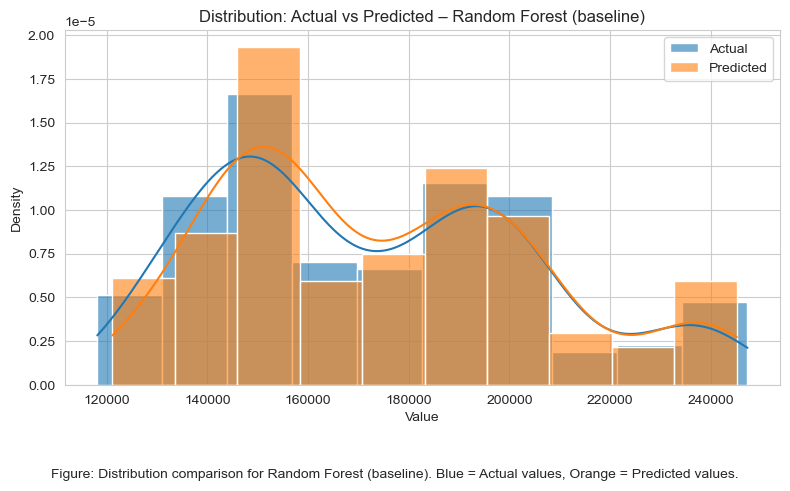

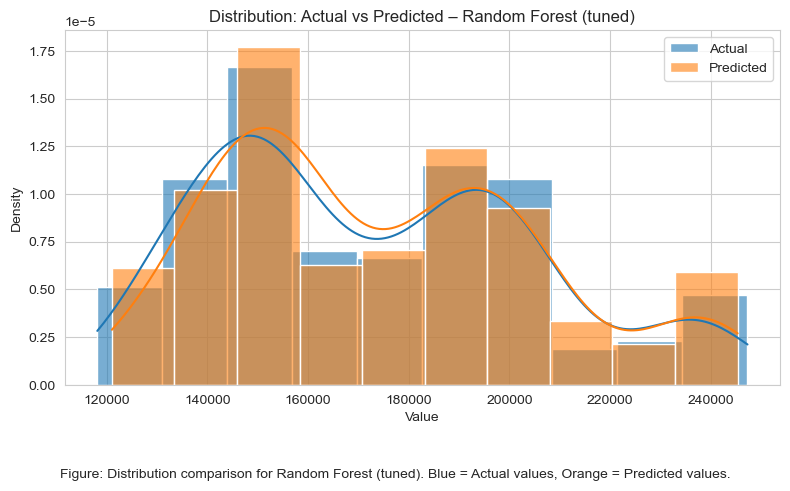

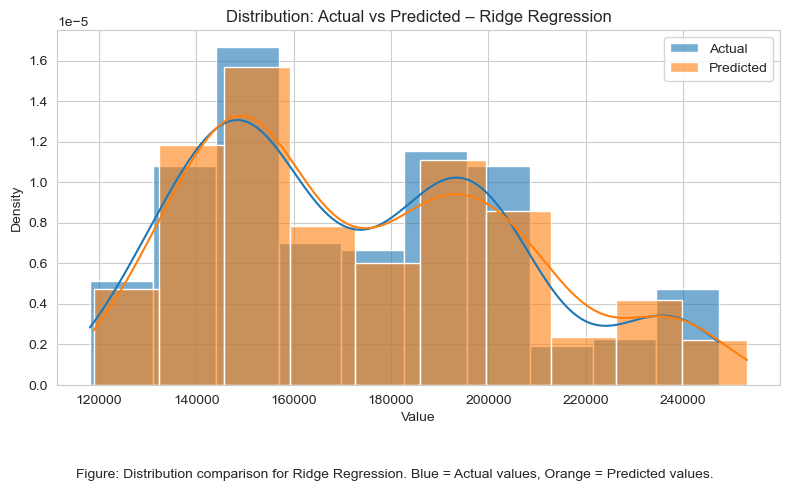

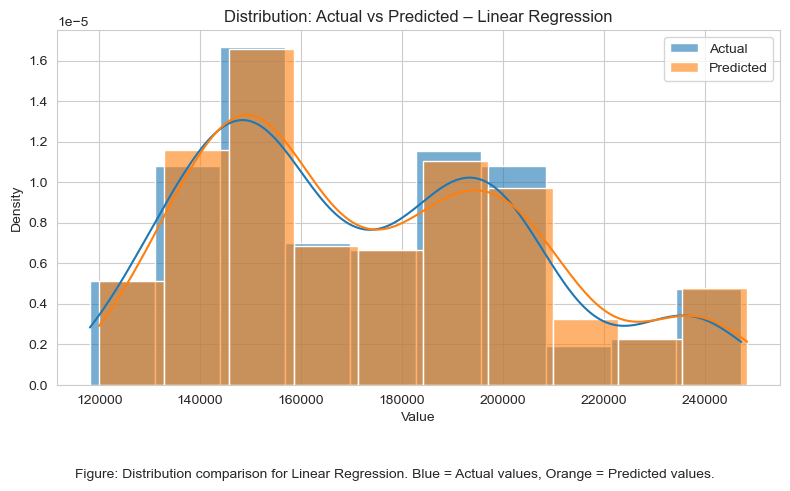

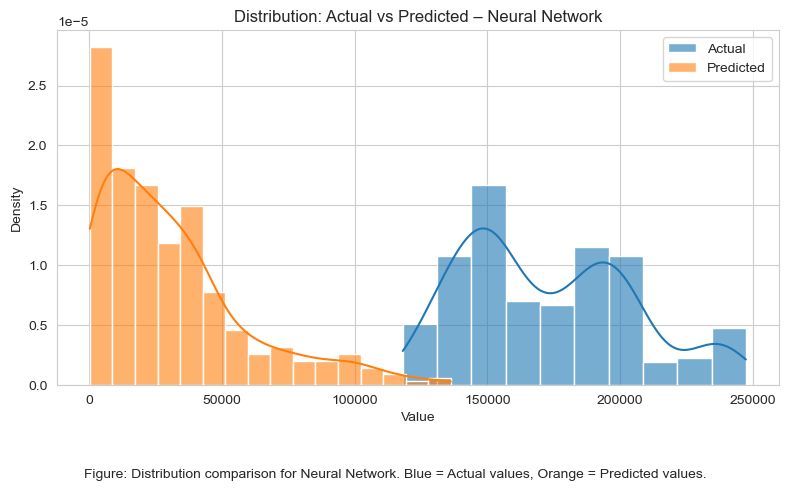

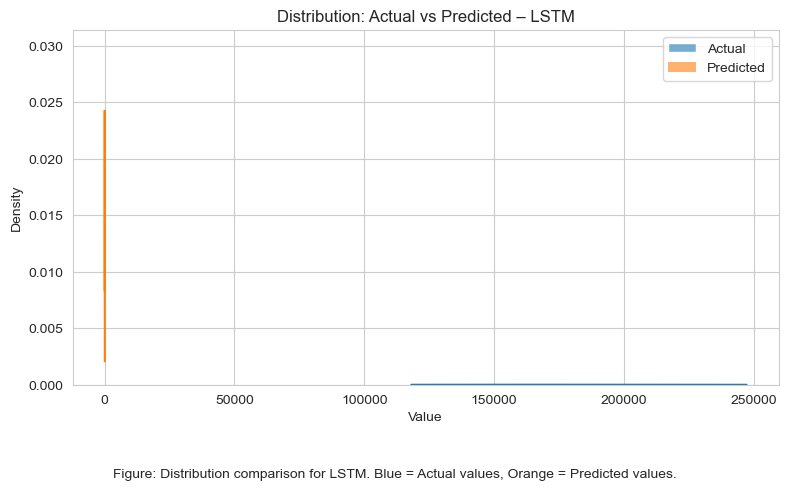

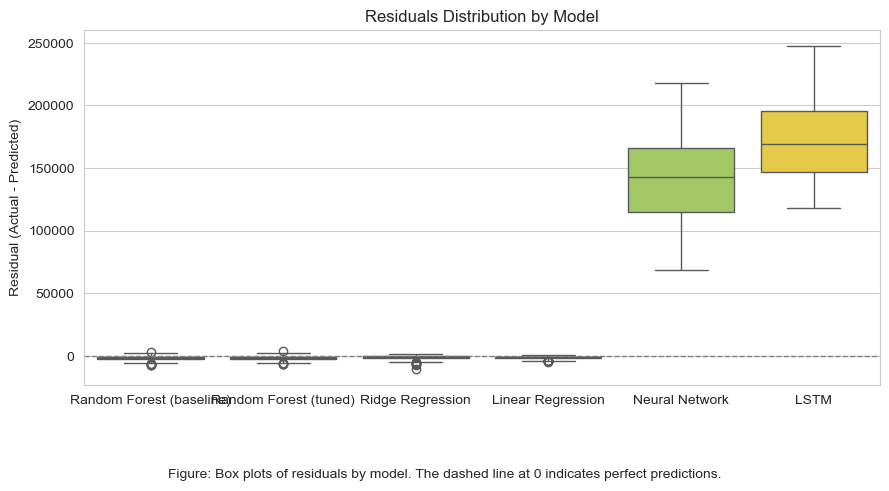

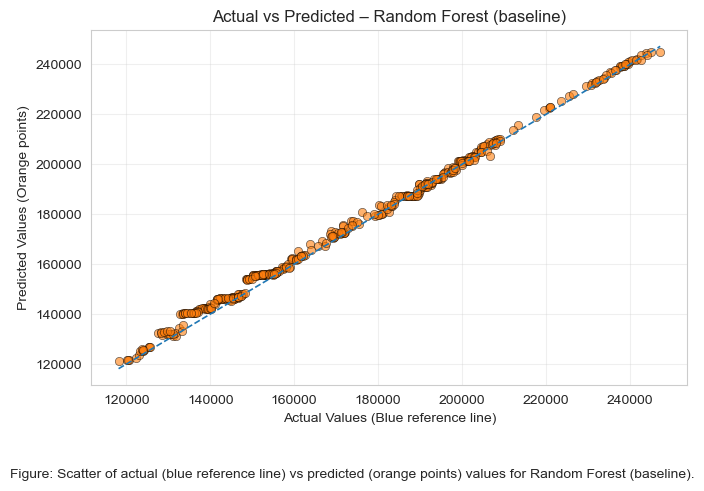

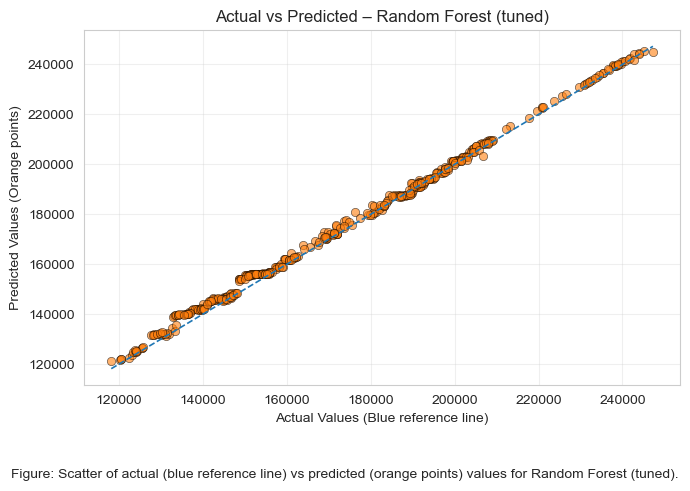

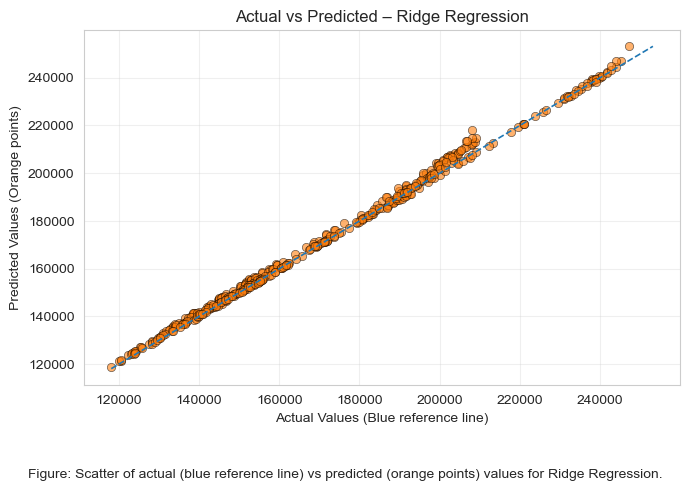

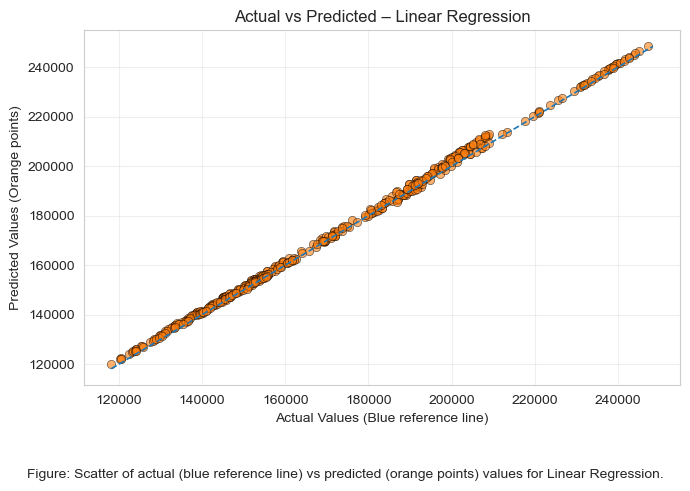

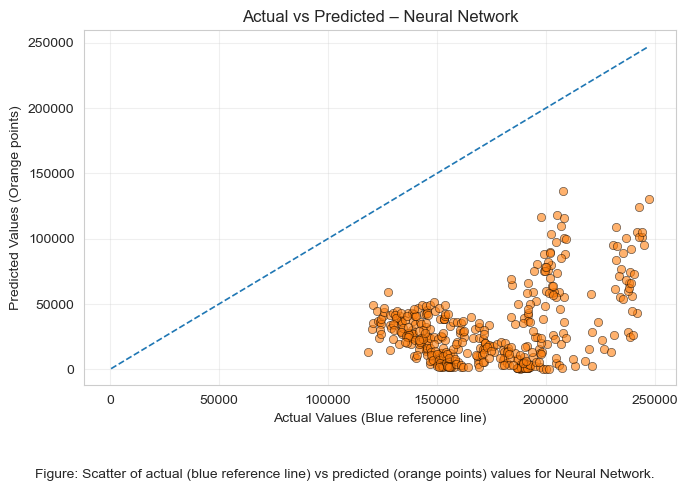

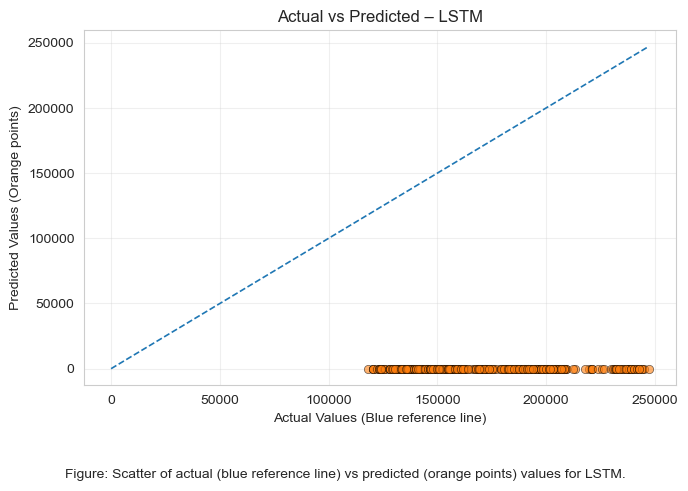

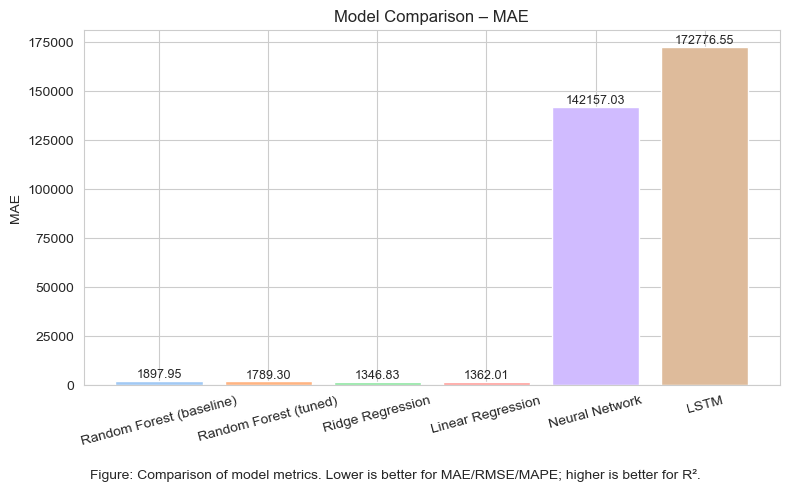

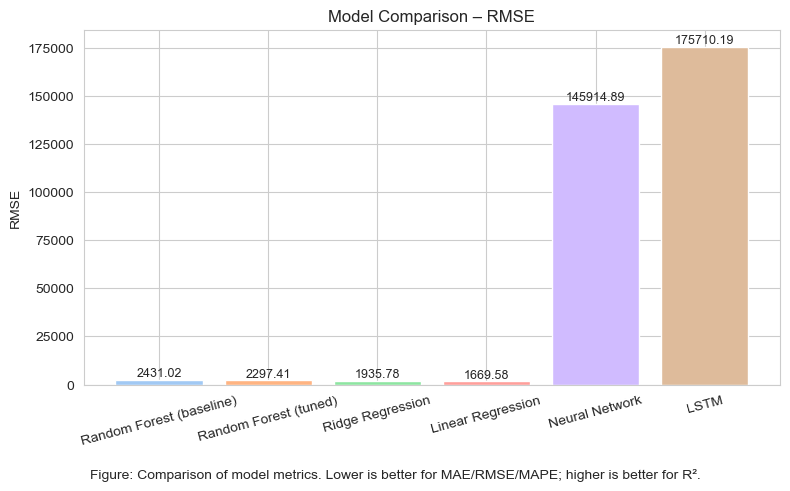

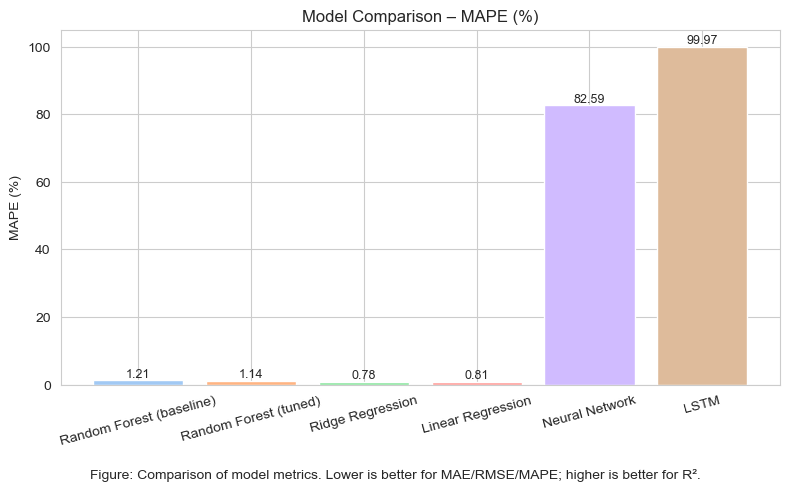

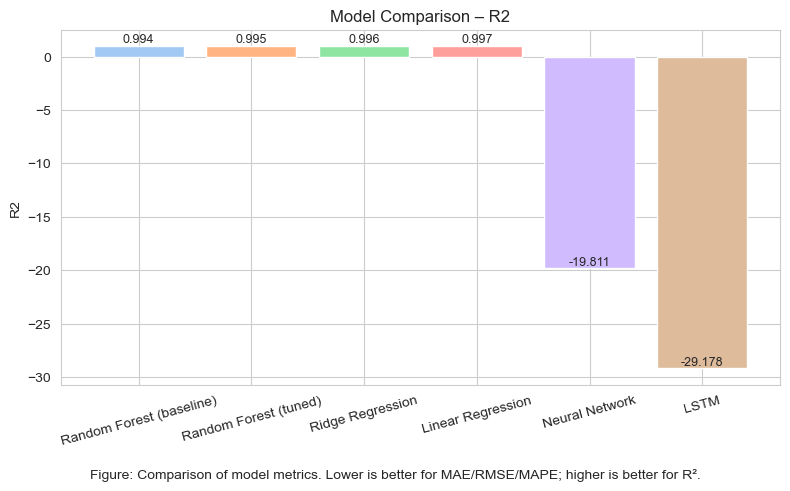

In [35]:
# =========================
# PLOTS (Histograms, Boxplots, Scatter, Metric Bars) with consistent colors
# =========================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

sns.set_style("whitegrid")
os.makedirs("plots", exist_ok=True)

# ---- Helpers ----
def rmse_version_safe(y_true, y_pred):
    try:
        return mean_squared_error(y_true, y_pred, squared=False)  # newer sklearn
    except TypeError:
        return np.sqrt(mean_squared_error(y_true, y_pred))        # older sklearn

def build_metrics_df(y_true, preds_dict):
    rows = {}
    for name, yhat in preds_dict.items():
        rows[name] = {
            "MAE": mean_absolute_error(y_true, yhat),
            "RMSE": rmse_version_safe(y_true, yhat),
            "R2": r2_score(y_true, yhat),
            "MAPE (%)": mean_absolute_percentage_error(y_true, yhat) * 100
        }
    return pd.DataFrame(rows).T

def save_with_caption(fig, filename, caption):
    fig.tight_layout()
    fig.subplots_adjust(bottom=0.22)
    fig.text(0.5, 0.04, caption, ha='center', va='center', fontsize=10, wrap=True)
    fig.savefig(os.path.join("plots", filename), bbox_inches='tight', dpi=140)
    plt.show()
    plt.close(fig)

metric_df = build_metrics_df(y_test, preds)

# Consistent colors
actual_color = "#1f77b4"     # Blue
predicted_color = "#ff7f0e"  # Orange

# 1) Histogram: Actual vs Predicted (per model)
for name, yhat in preds.items():
    fig = plt.figure(figsize=(8, 5))
    sns.histplot(y_test, label="Actual", kde=True, stat="density", alpha=0.6, color=actual_color)
    sns.histplot(yhat,  label="Predicted", kde=True, stat="density", alpha=0.6, color=predicted_color)
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.title(f"Distribution: Actual vs Predicted – {name}")
    plt.legend()
    save_with_caption(
        fig,
        f"{name.replace(' ', '_')}_histogram.png",
        f"Figure: Distribution comparison for {name}. "
        f"Blue = Actual values, Orange = Predicted values."
    )

# 2) Boxplot: Residuals per model
residuals_df = pd.DataFrame({model: (y_test.values - yhat) for model, yhat in preds.items()})
fig = plt.figure(figsize=(9, 5))
sns.boxplot(data=residuals_df, palette="Set2")
plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals Distribution by Model")
save_with_caption(
    fig,
    "residuals_boxplot.png",
    "Figure: Box plots of residuals by model. The dashed line at 0 indicates perfect predictions."
)

# 3) Scatter: Actual vs Predicted (per model) with consistent colors
for name, yhat in preds.items():
    fig = plt.figure(figsize=(7, 5))
    # Plot actual values on x-axis (blue) and predicted values on y-axis (orange)
    plt.scatter(y_test, yhat, alpha=0.6, color=predicted_color, edgecolor="black", linewidth=0.5)
    mn, mx = float(min(y_test.min(), yhat.min())), float(max(y_test.max(), yhat.max()))
    plt.plot([mn, mx], [mn, mx], linestyle='--', color=actual_color, linewidth=1.2)  # perfect fit line in blue
    plt.xlabel("Actual Values (Blue reference line)")
    plt.ylabel("Predicted Values (Orange points)")
    plt.title(f"Actual vs Predicted – {name}")
    plt.grid(True, alpha=0.3)
    save_with_caption(
        fig,
        f"{name.replace(' ', '_')}_actual_vs_pred.png",
        f"Figure: Scatter of actual (blue reference line) vs predicted (orange points) values for {name}."
    )

# 4) Metric bar charts: MAE, RMSE, MAPE, R2
metrics_to_plot = ['MAE', 'RMSE', 'MAPE (%)', 'R2']
for metric in metrics_to_plot:
    fig = plt.figure(figsize=(8, 5))
    colors = sns.color_palette("pastel", n_colors=len(metric_df))
    vals = metric_df[metric].values
    bars = plt.bar(metric_df.index, vals, color=colors)
    plt.title(f"Model Comparison – {metric}")
    plt.ylabel(metric)
    plt.xticks(rotation=15)
    for bar in bars:
        h = bar.get_height()
        txt = f"{h:.2f}" if metric != 'R2' else f"{h:.3f}"
        plt.text(bar.get_x() + bar.get_width()/2, h, txt, ha='center', va='bottom', fontsize=9)
    save_with_caption(
        fig,
        f"model_comparison_{metric.replace(' ', '_').lower()}.png",
        "Figure: Comparison of model metrics. Lower is better for MAE/RMSE/MAPE; higher is better for R²."
    )





In [38]:
# =========================
# CROSS-VALIDATION TABLE
# =========================
from sklearn.model_selection import cross_val_score, KFold

# Define CV strategy
cv = KFold(n_splits=5, shuffle=False)  # shuffle=False to preserve time order if needed

# Models to evaluate
cv_models = {
    "Random Forest (baseline)": rf_baseline,
    "Random Forest (tuned)": rf_best,
    "Ridge Regression": ridge_model,
    "Linear Regression": lr_model
}

cv_results = []

for name, model in cv_models.items():
    # MAE (negative, so take abs)
    mae_scores = -cross_val_score(model, X_imputed, y, cv=cv, scoring="neg_mean_absolute_error")
    # RMSE (negative MSE, so sqrt)
    rmse_scores = np.sqrt(-cross_val_score(model, X_imputed, y, cv=cv, scoring="neg_mean_squared_error"))
    # R²
    r2_scores = cross_val_score(model, X_imputed, y, cv=cv, scoring="r2")
    
    cv_results.append({
        "Model": name,
        "MAE Mean": mae_scores.mean(),
        "MAE Std": mae_scores.std(),
        "RMSE Mean": rmse_scores.mean(),
        "RMSE Std": rmse_scores.std(),
        "R2 Mean": r2_scores.mean(),
        "R2 Std": r2_scores.std()
    })

# Create DataFrame
cv_df = pd.DataFrame(cv_results)
cv_df = cv_df[["Model", "MAE Mean", "MAE Std", "RMSE Mean", "RMSE Std", "R2 Mean", "R2 Std"]]

# Round for readability
cv_df_rounded = cv_df.round(4)

print("\nCross-Validation Results (5-fold):")
print(cv_df_rounded.to_string(index=False))

# Save to CSV for report
cv_df_rounded.to_csv("plots/cross_validation_results.csv", index=False)



Cross-Validation Results (5-fold):
                   Model  MAE Mean   MAE Std  RMSE Mean   RMSE Std  R2 Mean  R2 Std
Random Forest (baseline) 5319.9975 4011.0320 11977.7541 10170.5839   0.9643  0.0568
   Random Forest (tuned) 5343.5847 4206.9700 12234.8742 10833.8368   0.9609  0.0643
        Ridge Regression 1257.8042  238.9167  1681.0207   477.2018   0.9991  0.0010
       Linear Regression 1257.1473  239.4338  1680.6136   477.4572   0.9991  0.0010
